**LINEAR REGRESSION**


In [ ]:
import pandas as pd
df=pd.read_csv("score.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


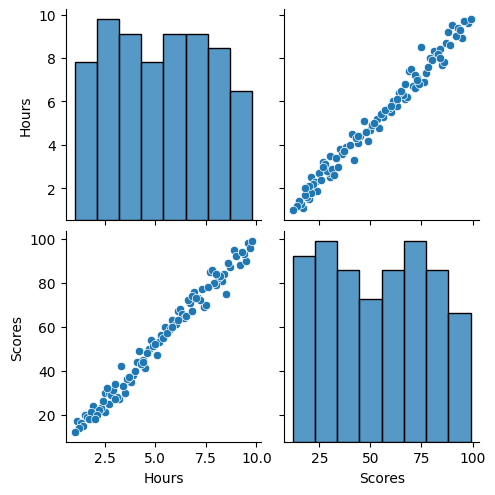

In [ ]:
import seaborn as sns
sns.pairplot(df)

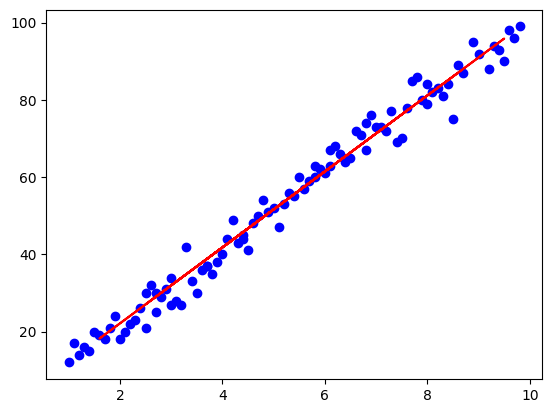

Predicted marks when studied for 7 hours is 71.29001113677432
Mean Squared Error: 17.007444250866516


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Split the data into features (X) and target variable (y)
X = np.array(df['Hours']).reshape(-1,1)
y = np.array(df['Scores'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
plt.scatter(X,y,color='blue')
plt.plot(X_test,y_pred,color='red')
plt.show()

# predict for a data
hrs=7
pred=model.predict([[hrs]])
print(f"Predicted marks when studied for {hrs} hours is {pred[0]}")

# Calculate Mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

**POLYNOMIAL REGRESSION**

In [ ]:
import pandas as pd
import seaborn as sns
data=pd.read_csv("HvsW.csv")
data.head()


,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139


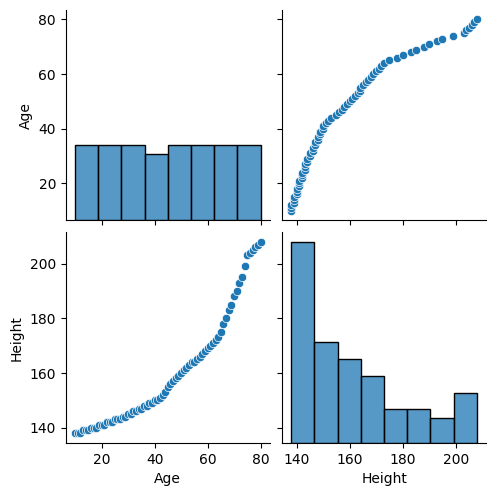

In [ ]:
import seaborn as sns
sns.pairplot(data)

Mean Squared Error on Test Set: 1.6427570808484935


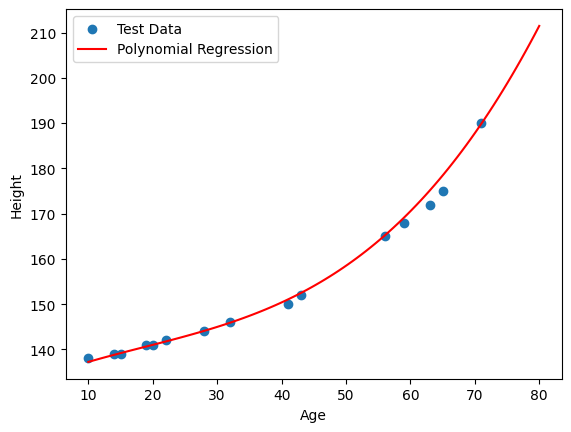

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Assuming data is your DataFrame with 'Height' and 'Age' columns
x = np.array(data['Age']).reshape(-1, 1)
y = np.array(data['Height'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit a polynomial of degree 3 to the training data
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_poly, y_train)

# Make predictions on the test set
x_test_poly = poly.transform(x_test)
y_pred = model.predict(x_test_poly)

# Calculate Mean Squared Error on the test set
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

# Generate a range of x values for the plot
myline = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
poly = poly.transform(myline)

# Plot the original data points
plt.scatter(x_test, y_test, label='Test Data')

# Plot the polynomial regression line
plt.plot(myline, model.predict(poly), color='red', label='Polynomial Regression')

# Labeling the axes
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend()
plt.show()



In [ ]:
poly = PolynomialFeatures(degree=3)

# Fit the polynomial features transformer to your training data
x_train_poly = poly.fit_transform(x_train)

# Now you can transform the new input value into polynomial features
age_new = 19
pred_features = poly.transform(np.array([[age_new]]))

# Predict using the transformed features
pred = model.predict(pred_features)

# Print the result
print(f"Predicted height for {age_new} age is {pred[0]}")


Predicted height for 19 age is 140.64072599181563
